In [59]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO
from Bio.Seq import Seq
from Bio import motifs

# UniProtKB

In [2]:
data_filepath = "input/data/coronaviridae/coronaviridae_seq_parsed.csv"
metadata_filepath = "input/data/coronaviridae/uniprot-coronoviridae-s-2023.05.03.tsv"

In [12]:
data_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", data_filepath))
metadata_df = pd.read_table(os.path.join(os.getcwd(), "..", "..", "..", metadata_filepath))

In [13]:
print(data_df.shape)
data_df.head()

(8692, 2)


,uniprot_id,seq
0,A0A2R4KP93,MRLSVCLLMFLLTPIKGDVDSGPPSSATSCKEADMRNSSSEFFNKQ...
1,A0A6B9WHD3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSSTRGVYYPDKVFRSS...
2,A0A6G6A1M4,MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...
3,A0A6M3G9R1,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...


In [14]:
print(metadata_df.shape)
metadata_df.head()

(8692, 7)


,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Virus hosts
0,A0A2R4KP93,A0A2R4KP93_MERS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Middle East respiratory syndrome-related coron...,1349,NaN
1,A0A6B9WHD3,A0A6B9WHD3_SARS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Bat coronavirus RaTG13,1269,NaN
2,A0A6G6A1M4,A0A6G6A1M4_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1267,NaN
3,A0A6M3G9R1,A0A6M3G9R1_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1265,NaN
4,A3EX94,SPIKE_BCHK4,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S 2,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...


In [15]:
df = data_df.set_index("uniprot_id").join(metadata_df.set_index("Entry"))

In [16]:
df.shape

(8692, 7)

In [17]:
df.reset_index(inplace=True)
df.head()

,uniprot_id,seq,Entry Name,Protein names,Gene Names,Organism,Length,Virus hosts
0,A0A2R4KP93,MRLSVCLLMFLLTPIKGDVDSGPPSSATSCKEADMRNSSSEFFNKQ...,A0A2R4KP93_MERS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Middle East respiratory syndrome-related coron...,1349,NaN
1,A0A6B9WHD3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSSTRGVYYPDKVFRSS...,A0A6B9WHD3_SARS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Bat coronavirus RaTG13,1269,NaN
2,A0A6G6A1M4,MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...,A0A6G6A1M4_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1267,NaN
3,A0A6M3G9R1,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...,A0A6M3G9R1_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1265,NaN
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,SPIKE_BCHK4,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S 2,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...


In [18]:
df = df[["uniprot_id", "seq", "Organism", "Length", "Virus hosts"]]
df.rename(columns={"uniprot_id": "id", "Organism": "virus", "Length": "seq_len", "Virus hosts": "virus_host"}, inplace=True)
print(df.shape)

(8692, 5)


In [19]:
df.head()

,id,seq,virus,seq_len,virus_host
0,A0A2R4KP93,MRLSVCLLMFLLTPIKGDVDSGPPSSATSCKEADMRNSSSEFFNKQ...,Middle East respiratory syndrome-related coron...,1349,NaN
1,A0A6B9WHD3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSSTRGVYYPDKVFRSS...,Bat coronavirus RaTG13,1269,NaN
2,A0A6G6A1M4,MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...,Pangolin coronavirus,1267,NaN
3,A0A6M3G9R1,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...,Pangolin coronavirus,1265,NaN
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...


In [20]:
n_virus_host_nan = df["virus_host"].isna().sum()
print(f"n_virus_host_nan= {n_virus_host_nan}")

n_virus_host_nan= 6146


In [21]:
virus_host_nan_df = df[df["virus_host"].isna()]

In [22]:
virus_host_nan_df.shape

(6146, 5)

In [23]:
virus_host_nan_df["virus"].value_counts()

Porcine epidemic diarrhea virus                                    2611
Infectious bronchitis virus                                         800
Feline coronavirus                                                  486
Canine coronavirus                                                  455
Middle East respiratory syndrome-related coronavirus (MERS-CoV)     349
                                                                   ... 
Bat SARS coronavirus HKU3-2                                           1
Bat SARS coronavirus HKU3-3                                           1
SARS coronavirus ZJ02                                                 1
SARS coronavirus Frankfurt 1                                          1
Bat SARS-like coronavirus Rs4087-1                                    1
Name: virus, Length: 403, dtype: int64

In [24]:
# Setting virus host for Porcine epidemic diarrhea virus
df.loc[df["virus"] == "Porcine epidemic diarrhea virus", "virus_host"] = "Sus scrofa (Pig) [TaxID: 9823]"

In [25]:
virus_host_nan_df = df[df["virus_host"].isna()]
virus_host_nan_df.shape

(3535, 5)

In [26]:
df = df[df["virus_host"].notna()]
df.shape

(5157, 5)

In [27]:
print(df["virus_host"].unique())

['Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]'
 'Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]'
 "Rousettus leschenaultii (Leschenault's rousette) [TaxID: 9408]"
 'Camelus dromedarius (Dromedary) (Arabian camel) [TaxID: 9838]; Homo sapiens (Human) [TaxID: 9606]'
 'Homo sapiens (Human) [TaxID: 9606]'
 'Gallus gallus (Chicken) [TaxID: 9031]'
 'Mus musculus (Mouse) [TaxID: 10090]' 'Bos taurus (Bovine) [TaxID: 9913]'
 'Homo sapiens (Human) [TaxID: 9606]; Paguma larvata (Masked palm civet) [TaxID: 9675]'
 'Rhinolophus macrotis (Big-eared horseshoe bat) [TaxID: 196889]'
 'Rhinolophus ferrumequinum (Greater horseshoe bat) [TaxID: 59479]; Rhinolophus macrotis (Big-eared horseshoe bat) [TaxID: 196889]; Rhinolophus pearsonii [TaxID: 188571]; Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]'
 'Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]'
 'Sus scrofa (Pig) [TaxID: 9823]' 'Rat

In [28]:
# split the virus_host name by ';' for multiple hosts
df["virus_host"] = df["virus_host"].transform(lambda x: x.split(";"))

In [29]:
df.shape

(5157, 5)

In [30]:
df.head()

,id,seq,virus,seq_len,virus_host
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,[Tylonycteris pachypus (Lesser bamboo bat) (Ve...
5,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,[Pipistrellus abramus (Japanese pipistrelle) (...
6,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,[Rousettus leschenaultii (Leschenault's rouset...
8,K9N5Q8,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,Middle East respiratory syndrome-related coron...,1353,[Camelus dromedarius (Dromedary) (Arabian came...
9,P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,[Homo sapiens (Human) [TaxID: 9606]]


In [31]:
df_exploded = df.explode("virus_host")
df_exploded["virus_host"] = df_exploded["virus_host"].transform(lambda x: x.strip())

In [32]:
df_exploded.shape

(5182, 5)

In [33]:
df_exploded.head()

,id,seq,virus,seq_len,virus_host
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...
5,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...
6,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,Rousettus leschenaultii (Leschenault's rousett...
8,K9N5Q8,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,Middle East respiratory syndrome-related coron...,1353,Camelus dromedarius (Dromedary) (Arabian camel...
8,K9N5Q8,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,Middle East respiratory syndrome-related coron...,1353,Homo sapiens (Human) [TaxID: 9606]


In [34]:
virus_hosts = df_exploded["virus_host"].unique()
print(len(virus_hosts))
print(virus_hosts)

22
['Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]'
 'Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]'
 "Rousettus leschenaultii (Leschenault's rousette) [TaxID: 9408]"
 'Camelus dromedarius (Dromedary) (Arabian camel) [TaxID: 9838]'
 'Homo sapiens (Human) [TaxID: 9606]'
 'Gallus gallus (Chicken) [TaxID: 9031]'
 'Mus musculus (Mouse) [TaxID: 10090]' 'Bos taurus (Bovine) [TaxID: 9913]'
 'Paguma larvata (Masked palm civet) [TaxID: 9675]'
 'Rhinolophus macrotis (Big-eared horseshoe bat) [TaxID: 196889]'
 'Rhinolophus ferrumequinum (Greater horseshoe bat) [TaxID: 59479]'
 'Rhinolophus pearsonii [TaxID: 188571]'
 'Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]'
 'Sus scrofa (Pig) [TaxID: 9823]' 'Rattus norvegicus (Rat) [TaxID: 10116]'
 'Felidae (cat family) [TaxID: 9681]'
 'Canis lupus familiaris (Dog) (Canis familiaris) [TaxID: 9615]'
 'Scotophilus kuhlii (Lesser asiatic yellow bat) [TaxID: 1

In [35]:
df_exploded = df_exploded.set_index("id")
print(f"Dataset size before removing duplicates: {df_exploded.shape}")
df_dedup = df_exploded[~df_exploded.index.duplicated(keep=False)]
print(f"Dataset size after removing duplicates: {df_dedup.shape}")

Dataset size before removing duplicates: (5182, 4)
Dataset size after removing duplicates: (5134, 4)


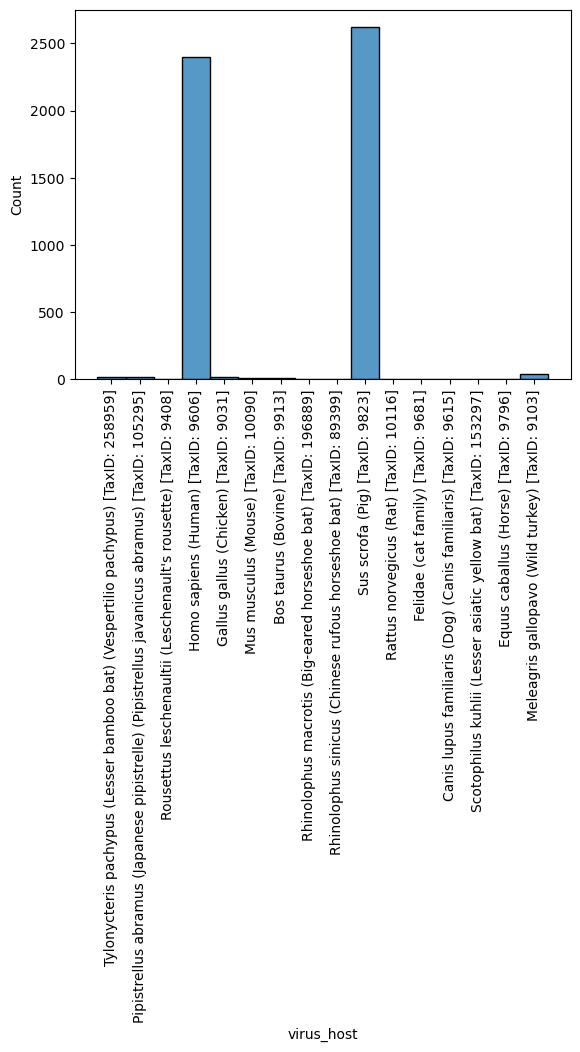

In [36]:
ax = sns.histplot(data=df_dedup, x="virus_host")
plt.xticks(rotation=90)
plt.show()

In [37]:
df_dedup["virus_host"].value_counts()

Sus scrofa (Pig) [TaxID: 9823]                                                                  2620
Homo sapiens (Human) [TaxID: 9606]                                                              2400
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                   36
Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]      19
Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]                  17
Gallus gallus (Chicken) [TaxID: 9031]                                                             13
Bos taurus (Bovine) [TaxID: 9913]                                                                 10
Mus musculus (Mouse) [TaxID: 10090]                                                                6
Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]                                  3
Canis lupus familiaris (Dog) (Canis familiaris) [TaxID: 9615]                              

In [38]:
# create host binary label: 'human' and 'not human'
df_dedup["binary_label"] = df_dedup["virus_host"].apply(lambda x: "Human" if x == "Homo sapiens (Human) [TaxID: 9606]" else "Not Human")

/tmp/ipykernel_6856/2983036214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup["binary_label"] = df_dedup["virus_host"].apply(lambda x: "Human" if x == "Homo sapiens (Human) [TaxID: 9606]" else "Not Human")


In [39]:
df_dedup["binary_label"].value_counts()

Not Human    2734
Human        2400
Name: binary_label, dtype: int64

In [40]:
df_dedup.reset_index(inplace=True)
df_dedup.head()

,id,seq,virus,seq_len,virus_host,binary_label
0,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...,Not Human
1,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...,Not Human
2,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,Rousettus leschenaultii (Leschenault's rousett...,Not Human
3,P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,Homo sapiens (Human) [TaxID: 9606],Human
4,P11223,MLVTPLLLVTLLCALCSAVLYDSSSYVYYYQSAFRPPSGWHLQGGA...,Avian infectious bronchitis virus (strain Beau...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human


In [ ]:
# df_dedup.to_csv(os.path.join(os.getcwd(), "..", "..", "input/data/coronaviridae", "coronaviridae_final.csv"), index=False)

In [42]:
df_dedup = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..", "input/data/coronaviridae", "coronaviridae_final.csv"))

In [43]:
df_dedup.shape

(5134, 6)

In [44]:
df_dedup.head()

,id,seq,virus,seq_len,virus_host,binary_label
0,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...,Not Human
1,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...,Not Human
2,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,Rousettus leschenaultii (Leschenault's rousett...,Not Human
3,P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,Homo sapiens (Human) [TaxID: 9606],Human
4,P11223,MLVTPLLLVTLLCALCSAVLYDSSSYVYYYQSAFRPPSGWHLQGGA...,Avian infectious bronchitis virus (strain Beau...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human


In [45]:
df_dedup["virus_host"].value_counts()

Sus scrofa (Pig) [TaxID: 9823]                                                                  2620
Homo sapiens (Human) [TaxID: 9606]                                                              2400
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                   36
Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]      19
Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]                  17
Gallus gallus (Chicken) [TaxID: 9031]                                                             13
Bos taurus (Bovine) [TaxID: 9913]                                                                 10
Mus musculus (Mouse) [TaxID: 10090]                                                                6
Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]                                  3
Canis lupus familiaris (Dog) (Canis familiaris) [TaxID: 9615]                              

In [46]:
low_count_virus_hosts = ["Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]", "Canis lupus familiaris (Dog) (Canis familiaris) [TaxID: 9615]", "Rousettus leschenaultii (Leschenault's rousette) [TaxID: 9408]", "Rhinolophus macrotis (Big-eared horseshoe bat) [TaxID: 196889]", "Rattus norvegicus (Rat) [TaxID: 10116]", "Felidae (cat family) [TaxID: 9681]", "Scotophilus kuhlii (Lesser asiatic yellow bat) [TaxID: 153297]", "Scotophilus kuhlii (Lesser asiatic yellow bat) [TaxID: 153297]", "Equus caballus (Horse) [TaxID: 9796]", "Mus musculus (Mouse) [TaxID: 10090]"]
df_dedup_top_6_hosts = df_dedup[~df_dedup["virus_host"].isin(low_count_virus_hosts)]

In [47]:
df_dedup_top_6_hosts.shape

(5115, 6)

In [48]:
df_dedup_top_6_hosts["virus_host"].value_counts()

Sus scrofa (Pig) [TaxID: 9823]                                                                  2620
Homo sapiens (Human) [TaxID: 9606]                                                              2400
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                   36
Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]      19
Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]                  17
Gallus gallus (Chicken) [TaxID: 9031]                                                             13
Bos taurus (Bovine) [TaxID: 9913]                                                                 10
Name: virus_host, dtype: int64

In [ ]:
# df_dedup_top_6_hosts.to_csv(os.path.join(os.getcwd(), "..", "..", "input/data/coronaviridae", "coronaviridae_top_6_hosts.csv"), index=False)

# UniRef90

In [5]:
seq_parsed_filepath = os.path.join(os.getcwd(), "..", "..", "input/data/coronaviridae/uniref90_parsed.csv")
seq_with_hosts_parsed_filepath = os.path.join(os.getcwd(), "..", "..", "input/data/coronaviridae/uniref90_w_hosts.csv")

In [11]:
df = pd.read_csv(seq_parsed_filepath).drop(columns=["Unnamed: 0"])

In [14]:
print("parsed df size = ", df.shape)
df.head()

parsed df size =  (4510, 3)


,uniref90_id,tax_id,seq
0,UniRef90_A0A023PN62,11120,MLNLEAIIESGDPVIPKIQFNLQHISGV
1,UniRef90_A0A023PNS4,11120,MLNLEAIIETGDQVIQQISFNLQHISSVLETQIFDPFECCYYSSGS...
2,UniRef90_A0A023PP06,11120,MMNLLNKSLEENGSFLTALYIFVGFLAFYLLGRALQAFVQAADACC...
3,UniRef90_A0A023PSW4,694002,MKLLIVFGLLTIVYGMHKECTIQECCENQPYILEDPCPIHYYSDWY...
4,UniRef90_A0A023PUW9,2509511,MFLTCFILSFSLFCVSGDSIDTCETFDDVSPPQQNLVSSSKRGVYY...


In [22]:
df = pd.read_csv(seq_with_hosts_parsed_filepath, header=None).rename(columns={0: "uniref90_id", 1: "tax_id", 2: "host_ids"})

In [23]:
print("parsed df size = ", df.shape)
df.head()

parsed df size =  (4510, 3)


,uniref90_id,tax_id,host_ids
0,UniRef90_A0A2H4ZBK9,694448,[]
1,UniRef90_A0A023PN62,11120,[]
2,UniRef90_A0A6G9KMG9,2708335,[]
3,UniRef90_A0A8B6RG64,2697049,[9606]
4,UniRef90_Q5Q1B8,11120,[]


In [25]:
df["n_host_ids"] = df["host_ids"].apply(lambda x: len(x))
df.head()

,uniref90_id,tax_id,host_ids,n_host_ids
0,UniRef90_A0A2H4ZBK9,694448,[],2
1,UniRef90_A0A023PN62,11120,[],2
2,UniRef90_A0A6G9KMG9,2708335,[],2
3,UniRef90_A0A8B6RG64,2697049,[9606],6
4,UniRef90_Q5Q1B8,11120,[],2


In [27]:
w_hosts = df[df["n_host_ids"] > 0]
wo_hosts = df[df["n_host_ids"] == 0]

print(f"w_hosts shape = {w_hosts.shape}")
print(f"wo_hosts shape = {wo_hosts.shape}")
             
             
             

w_hosts shape = (4510, 4)
wo_hosts shape = (0, 4)


### Sequence Alignment

In [50]:
input_file_path = "/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/coronaviridae_top_7_hosts.csv"
coronaviridae_top_7_df = pd.read_csv(input_file_path)

In [61]:
coronaviridae_top_7_df

,id,seq
0,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...
1,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...
2,P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
3,P11223,MLVTPLLLVTLLCALCSAVLYDSSSYVYYYQSAFRPPSGWHLQGGA...
4,P12651,MLVTPLLLVTLLCVLCSAALYDSSSYVYYYQSAFRPPNGWHLHGGA...
...,...,...
5110,U5LXF4,LSHEQPISFVTLPSFNDHSFVNITVSASFGGRSGANLIASDTTING...
5111,U5LXF9,LSHEQPISFVTLPSFNDHSFVNITVSASFGGHSGANLIASDTTING...
5112,U5LXN0,LSHEQPISFVTLPSFNDHSFVNITVSAAFGGHSGANLIASDTTING...
5113,U5LXN4,LSHEQPISFVTLPSFNDHSFVNITVSASFGGHSGANLIASDTTING...


In [57]:
# Convert to Fasta Format
# 1. Convert pandas df to tab format
coronaviridae_top_7_df = coronaviridae_top_7_df[["id", "seq"]]
coronaviridae_top_7_df.to_csv("/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/coronaviridae_top_7_hosts.tab", sep="\t", index=False)

In [60]:
# 2. Convert from tab to fasta
records_count = SeqIO.convert("/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/coronaviridae_top_7_hosts.tab", "tab", 
                             "/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/coronaviridae_top_7_hosts.fasta", "fasta")
print(f"Converted {records_count} records")

Converted 5116 records


In [62]:
# # Convert aligned sequences from fasta back to tab
records_count = SeqIO.convert("/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/alignement-mafft/cov_s_prot_alignement_5k_ba.fasta", "fasta", 
                             "/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/cov_s_prot_alignement_5k.tab", "tab")
print(f"Converted {records_count} records")

Converted 5115 records


In [63]:
coronaviridae_top_7_aligned_df = pd.read_csv("/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/cov_s_prot_alignement_5k.tab", sep="\t", header=None, names=["id", "seq"])

In [64]:
coronaviridae_top_7_aligned_df

,id,seq
0,A3EX94,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...
1,A0A6F8II97,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...
2,S4WYD2,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...
3,S4WWQ3,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...
4,S4WZQ1,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...
...,...,...
5110,P12722,--MLERSLLLATLLSALC---SANLFGNNSYV--------------...
5111,P30207,-----------------------NLFGNNSYV--------------...
5112,P30208,-----------------------NLFGNNSYV--------------...
5113,P17662,--MLEKSLLLVTLLFALC---SANLFGNNSYV--------------...


In [69]:
# merge it back with the original dataset
df = df_dedup_top_6_hosts.set_index("id").join(coronaviridae_top_7_aligned_df.set_index("id"), rsuffix="_aligned")

In [70]:
df

,seq,virus,seq_len,virus_host,binary_label,seq_aligned
id,,,,,,
A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...,Not Human,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...
A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...,Not Human,--MIRSVLVLMCSLTFI----GNLTRGQSVDMGHNGTGS-CLDS--...
P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,Homo sapiens (Human) [TaxID: 9606],Human,---------MFVFLVLL-----------------------------...
P11223,MLVTPLLLVTLLCALCSAVLYDSSSYVYYYQSAFRPPSGWHLQGGA...,Avian infectious bronchitis virus (strain Beau...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human,--MLVTP---LLLVTLLC------ALCSAVLY----DSSSYV----...
P12651,MLVTPLLLVTLLCVLCSAALYDSSSYVYYYQSAFRPPNGWHLHGGA...,Avian infectious bronchitis virus (strain M41)...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human,--MLVTP---LLLVTLLC------VLCSAALY----DSSSYV----...
...,...,...,...,...,...,...
U5LXF4,LSHEQPISFVTLPSFNDHSFVNITVSASFGGRSGANLIASDTTING...,Porcine epidemic diarrhea virus,298,Sus scrofa (Pig) [TaxID: 9823],Not Human,----------------------------------------------...
U5LXF9,LSHEQPISFVTLPSFNDHSFVNITVSASFGGHSGANLIASDTTING...,Porcine epidemic diarrhea virus,298,Sus scrofa (Pig) [TaxID: 9823],Not Human,----------------------------------------------...
U5LXN0,LSHEQPISFVTLPSFNDHSFVNITVSAAFGGHSGANLIASDTTING...,Porcine epidemic diarrhea virus,298,Sus scrofa (Pig) [TaxID: 9823],Not Human,----------------------------------------------...


In [80]:
df["aligned_seq_len"] = df.apply(lambda x: len(x["seq_aligned"]), axis=1)
df["aligned_token_count"] = df.apply(lambda x: len(x["seq_aligned"]) - str(x["seq_aligned"]).count("-"), axis=1)
df

,seq,virus,seq_len,virus_host,binary_label,seq_aligned,aligned_seq_len,aligned_token_count
id,,,,,,,,
A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...,Not Human,--MTLLMCLLMSLLIFV----RG-CDSQFVDMSPASNTSECLES--...,2169,1352
A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...,Not Human,--MIRSVLVLMCSLTFI----GNLTRGQSVDMGHNGTGS-CLDS--...,2169,1352
P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,Homo sapiens (Human) [TaxID: 9606],Human,---------MFVFLVLL-----------------------------...,2169,1273
P11223,MLVTPLLLVTLLCALCSAVLYDSSSYVYYYQSAFRPPSGWHLQGGA...,Avian infectious bronchitis virus (strain Beau...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human,--MLVTP---LLLVTLLC------ALCSAVLY----DSSSYV----...,2169,1162
P12651,MLVTPLLLVTLLCVLCSAALYDSSSYVYYYQSAFRPPNGWHLHGGA...,Avian infectious bronchitis virus (strain M41)...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human,--MLVTP---LLLVTLLC------VLCSAALY----DSSSYV----...,2169,1162
...,...,...,...,...,...,...,...,...
U5LXF4,LSHEQPISFVTLPSFNDHSFVNITVSASFGGRSGANLIASDTTING...,Porcine epidemic diarrhea virus,298,Sus scrofa (Pig) [TaxID: 9823],Not Human,----------------------------------------------...,2169,298
U5LXF9,LSHEQPISFVTLPSFNDHSFVNITVSASFGGHSGANLIASDTTING...,Porcine epidemic diarrhea virus,298,Sus scrofa (Pig) [TaxID: 9823],Not Human,----------------------------------------------...,2169,298
U5LXN0,LSHEQPISFVTLPSFNDHSFVNITVSAAFGGHSGANLIASDTTING...,Porcine epidemic diarrhea virus,298,Sus scrofa (Pig) [TaxID: 9823],Not Human,----------------------------------------------...,2169,298


In [81]:
print(f"Max seq_length = {df['seq_len'].max()}")
print(f"Max seq_length = {df['aligned_seq_len'].max()}")

Max seq_length = 1449
Max seq_length = 2169


<AxesSubplot:xlabel='seq_len', ylabel='Count'>

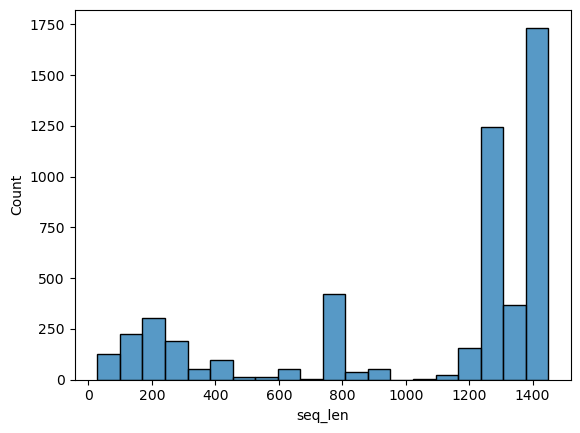

In [82]:
sns.histplot(df["seq_len"])

<AxesSubplot:xlabel='aligned_seq_len', ylabel='Count'>

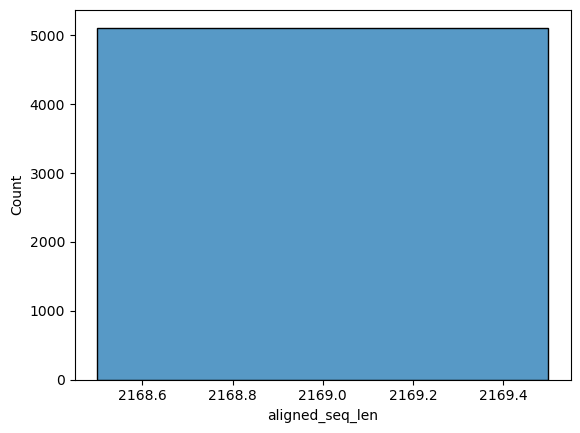

In [83]:
sns.histplot(df["aligned_seq_len"])

In [84]:
df.reset_index().to_csv("/home/grads/blessyantony/dev/git/zoonosis/input/data/coronaviridae/cov_s_prot_alignment_5k.csv", index=False)